<a href="https://colab.research.google.com/github/SULABH11/Machine-Learning-Models/blob/main/predict_credit_card_approval_based_on_customer_information_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
!pip install optuna
import optuna 
from scipy import stats
### To ignore warnings
import warnings 
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 7.9 MB/s eta 0:00:00


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [6]:
credit_df = pd.read_csv('credit_record.csv')
label_df = pd.read_csv('application_record.csv')

In [7]:
df = label_df.merge(credit_df, how='inner', on=['ID'])
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [8]:
#Creating copy of data
credit_card = df.copy()

In [9]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [10]:
#Assigning index with client ID
credit_card.index = credit_card ['ID']
credit_card.drop('ID',axis=1,inplace=True)

In [11]:
#Drop Duplicates
credit_card.drop_duplicates(inplace=True)

In [12]:
#Initial five rows
credit_card.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
ID,,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [13]:
#Brief description
credit_card.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,468925.000000,4.689250e+05,468925.000000,468925.000000,468925.0,468925.000000,468925.000000,468925.000000,468925.000000,468925.000000
mean,0.421415,1.858502e+05,-16158.295521,60224.031389,1.0,0.225379,0.297472,0.089230,2.197081,-20.979513
std,0.747775,1.009916e+05,4130.224148,138588.126971,0.0,0.417832,0.457146,0.285075,0.910155,14.680523
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,0.000000,1.215000e+05,-19584.000000,-3246.000000,1.0,0.000000,0.000000,0.000000,2.000000,-32.000000
50%,0.000000,1.575000e+05,-15812.000000,-1610.000000,1.0,0.000000,0.000000,0.000000,2.000000,-19.000000
75%,1.000000,2.250000e+05,-12724.000000,-398.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [14]:
#Summary of data

credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468925 entries, 5008804 to 5150337
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          468925 non-null  object 
 1   FLAG_OWN_CAR         468925 non-null  object 
 2   FLAG_OWN_REALTY      468925 non-null  object 
 3   CNT_CHILDREN         468925 non-null  int64  
 4   AMT_INCOME_TOTAL     468925 non-null  float64
 5   NAME_INCOME_TYPE     468925 non-null  object 
 6   NAME_EDUCATION_TYPE  468925 non-null  object 
 7   NAME_FAMILY_STATUS   468925 non-null  object 
 8   NAME_HOUSING_TYPE    468925 non-null  object 
 9   DAYS_BIRTH           468925 non-null  int64  
 10  DAYS_EMPLOYED        468925 non-null  int64  
 11  FLAG_MOBIL           468925 non-null  int64  
 12  FLAG_WORK_PHONE      468925 non-null  int64  
 13  FLAG_PHONE           468925 non-null  int64  
 14  FLAG_EMAIL           468925 non-null  int64  
 15  OCCUPATION

In [15]:
#Getting unique values from each features
for i in credit_card.columns:
    print(i,'-',credit_card[i].unique())

CODE_GENDER - ['M' 'F']
FLAG_OWN_CAR - ['Y' 'N']
FLAG_OWN_REALTY - ['Y' 'N']
CNT_CHILDREN - [ 0  1  3  2  4  5 14 19  7]
AMT_INCOME_TOTAL - [ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500.   267750.   139500.
   67500.   252000.   900000.   115290.   279000.    76500.   234000.
   81000.   108000.    99000.   198000.    45000.   238500.   117000.
  153000.  1350000.   445500.   495000.    85500.   306000.   562500.
  189000.   328500.   310500.   540000.   171000.   675000.   121500.
   72000.    65250.   184500.   103500.   162000.   165150.    54000.
  243000.   256500.    33300.   697500.   101250.    58500.   110250.
  472500.   196650.   630000.   432000.   257625.   143100.   207000.
  288000.   131400. 

In [16]:
#Type casting
credit_card['CODE_GENDER'] = credit_card['CODE_GENDER'].astype('category')
credit_card['FLAG_OWN_CAR'] = credit_card['FLAG_OWN_CAR'].astype('category')
credit_card['NAME_INCOME_TYPE'] = credit_card['NAME_INCOME_TYPE'].astype('category')
credit_card['FLAG_OWN_REALTY'] = credit_card['FLAG_OWN_REALTY'].astype('category')
credit_card['NAME_EDUCATION_TYPE'] = credit_card['NAME_EDUCATION_TYPE'].astype('category')
credit_card['NAME_FAMILY_STATUS'] = credit_card['NAME_FAMILY_STATUS'].astype('category')
credit_card['NAME_HOUSING_TYPE'] = credit_card['NAME_HOUSING_TYPE'].astype('category')
credit_card['OCCUPATION_TYPE'] = credit_card['OCCUPATION_TYPE'].astype('category')
credit_card['STATUS'] = credit_card['STATUS'].astype('category')
credit_card['FLAG_MOBIL'] = credit_card['FLAG_MOBIL'].astype('category')
credit_card['FLAG_WORK_PHONE'] = credit_card['FLAG_WORK_PHONE'].astype('category')
credit_card['FLAG_PHONE'] = credit_card['FLAG_PHONE'].astype('category')
credit_card['FLAG_EMAIL'] = credit_card['FLAG_EMAIL'].astype('category')

In [17]:
#Getting Age and WorkTerm info
credit_card['AGE']=-(credit_card['DAYS_BIRTH'])//365
credit_card['WORKTERM']=-(credit_card['DAYS_EMPLOYED'])//365

credit_card['WORKTERM']= credit_card['WORKTERM'].replace(-1001,-1)
credit_card.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],axis = 1,inplace=True)

# replacing the value of C,X to numeric value 
credit_card['STATUS'].replace({'C': 6, 'X' : 7}, inplace=True)
credit_card['STATUS']=credit_card['STATUS'].astype(int)

In [18]:
def get_label(status):
    if status in (2,3,4,5):
        return 1  # Risky
    else:
        return 0 # Not Risky

In [19]:
credit_card['LABEL'] = credit_card['STATUS'].apply(get_label)
credit_card['LABEL']=credit_card['LABEL'].astype('category')
credit_card.drop('STATUS',axis = 1,inplace=True)

In [20]:
credit_card['WORKTERM'].unique()

array([12,  3,  8, -1,  2,  4,  5, 19, 14, 13,  7,  6, 17, 29,  1, 15, 11,
        0, 10, 23, 24, 20,  9, 27, 26, 18, 21, 22, 16, 28, 38, 32, 31, 36,
       37, 30, 39, 25, 34, 33, 41, 40, 35, 43, 42])

In [21]:
#Checking for empty cells
credit_card.isnull().sum() * 100 / credit_card.shape[0]

CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.880418
CNT_FAM_MEMBERS         0.000000
MONTHS_BALANCE          0.000000
AGE                     0.000000
WORKTERM                0.000000
LABEL                   0.000000
dtype: float64

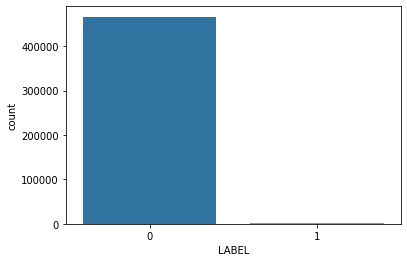

In [22]:
sns.countplot(x=credit_card["LABEL"])

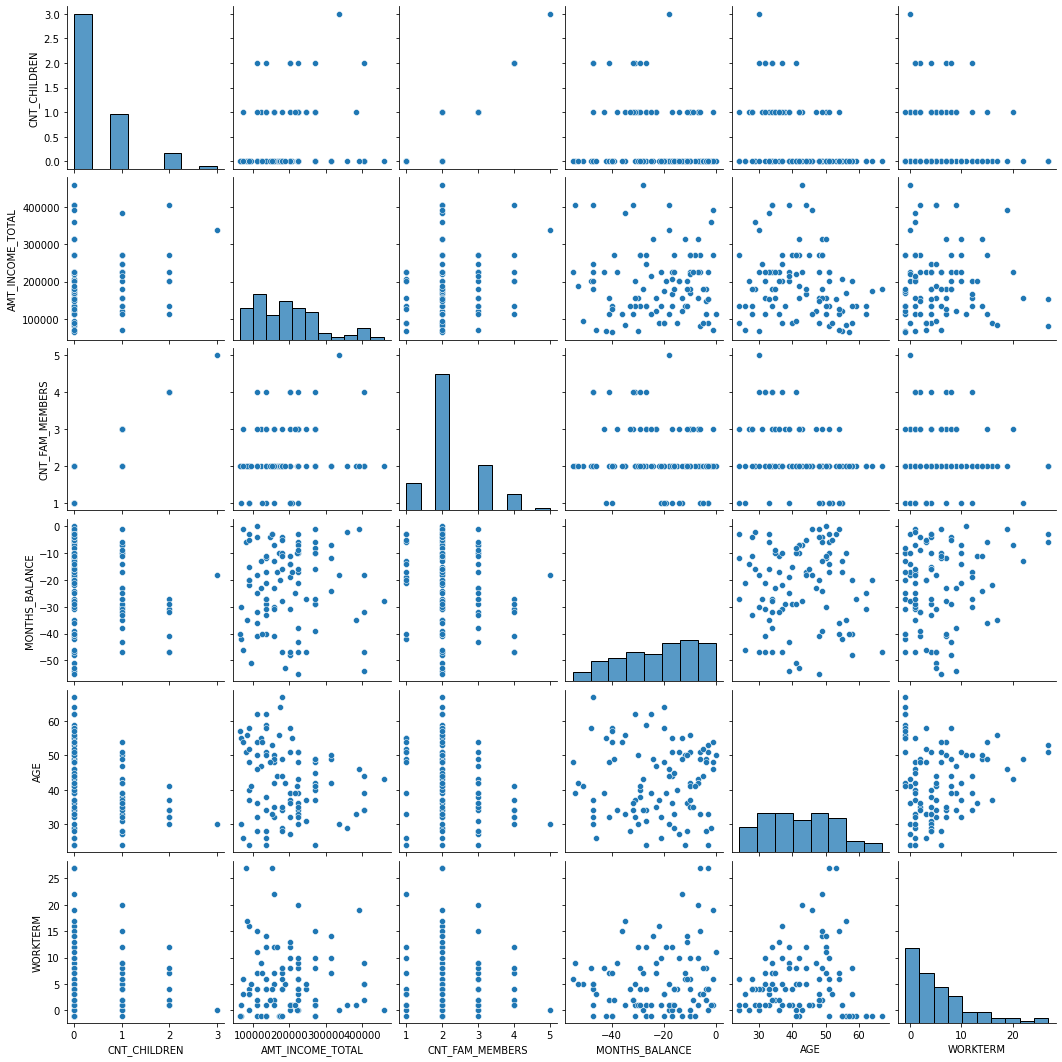

In [23]:
sns.pairplot(credit_card.sample(100))

In [24]:
credit_card.skew()

CNT_CHILDREN        2.822807
AMT_INCOME_TOTAL    2.668338
CNT_FAM_MEMBERS     1.438902
MONTHS_BALANCE     -0.483808
AGE                 0.157029
WORKTERM            1.650938
dtype: float64

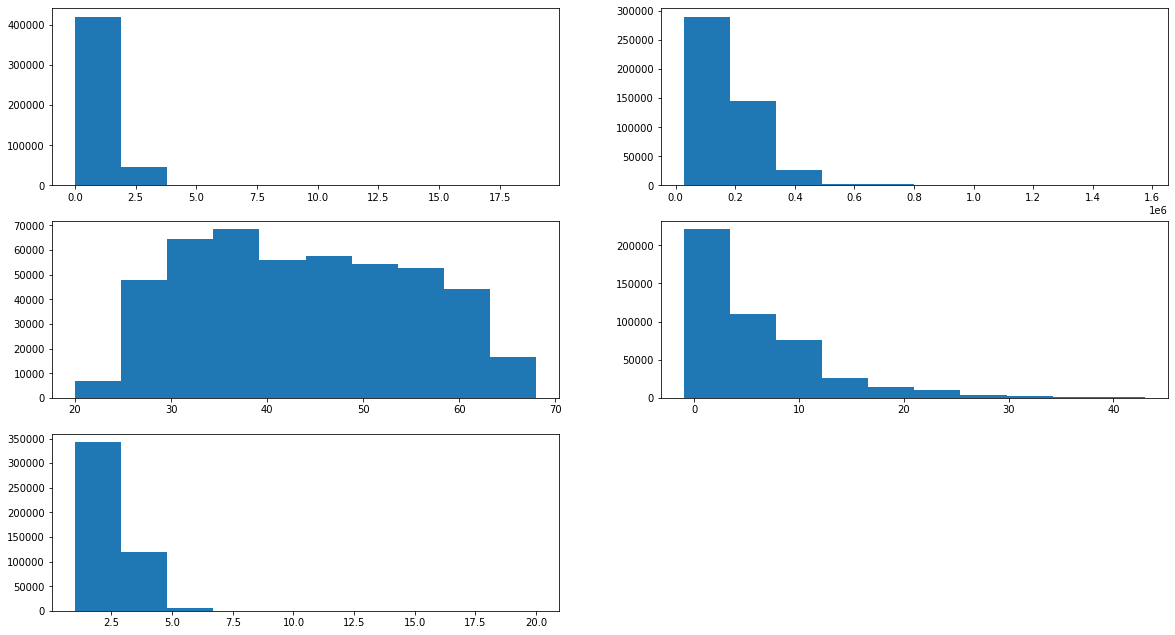

In [25]:
plt.figure(figsize=[20,15])
plt.subplot(4,2,1)
plt.hist(data= credit_card, x='CNT_CHILDREN')
plt.subplot(4,2,2)
plt.hist(data= credit_card, x='AMT_INCOME_TOTAL')
plt.subplot(4,2,3)
plt.hist(data= credit_card, x='AGE')
plt.subplot(4,2,4)
plt.hist(data= credit_card, x='WORKTERM')
plt.subplot(4,2,5)
plt.hist(data= credit_card, x='CNT_FAM_MEMBERS')
plt.show()

In [26]:
import plotly.figure_factory as ff
credit_card_corr = credit_card.corr(method='spearman') # Generate correlation matrix for spearman correlation

x = list(credit_card_corr.columns)
y = list(credit_card_corr.index)
z = np.array(credit_card_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Viridis'
    )
fig.show()

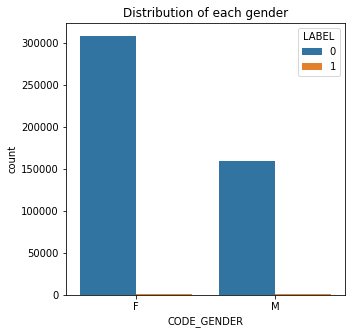

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(x='CODE_GENDER', data=credit_card,hue='LABEL')
plt.title('Distribution of each gender')
plt.show()

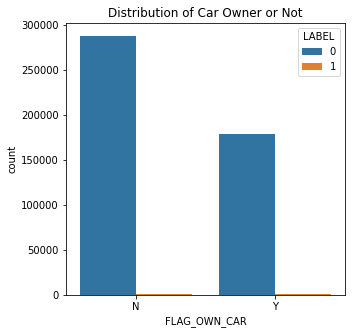

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(x='FLAG_OWN_CAR', data=credit_card,hue='LABEL')
plt.title('Distribution of Car Owner or Not')
plt.show()

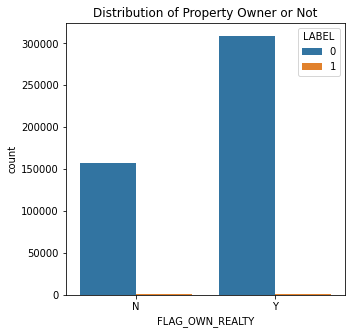

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(x='FLAG_OWN_REALTY', data=credit_card,hue='LABEL')
plt.title('Distribution of Property Owner or Not')
plt.show()

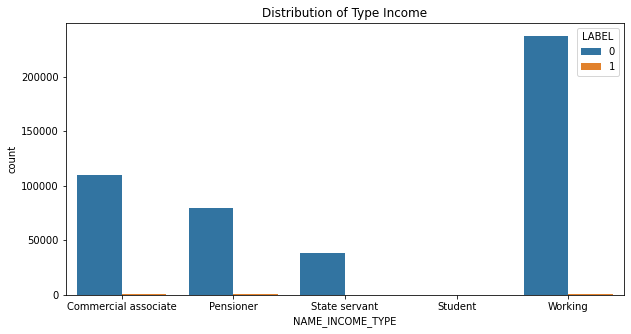

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='NAME_INCOME_TYPE', data=credit_card,hue='LABEL')
plt.title('Distribution of Type Income')
plt.show()

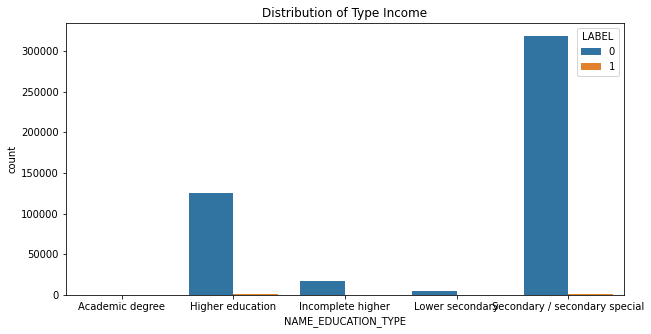

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='NAME_EDUCATION_TYPE', data=credit_card,hue='LABEL')
plt.title('Distribution of Type Income')
plt.show()

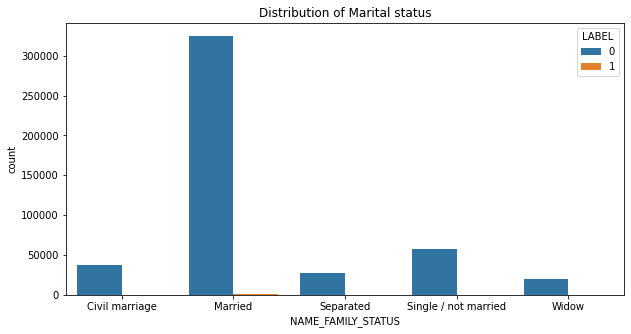

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='NAME_FAMILY_STATUS', data=credit_card,hue='LABEL')
plt.title('Distribution of Marital status')
plt.show()

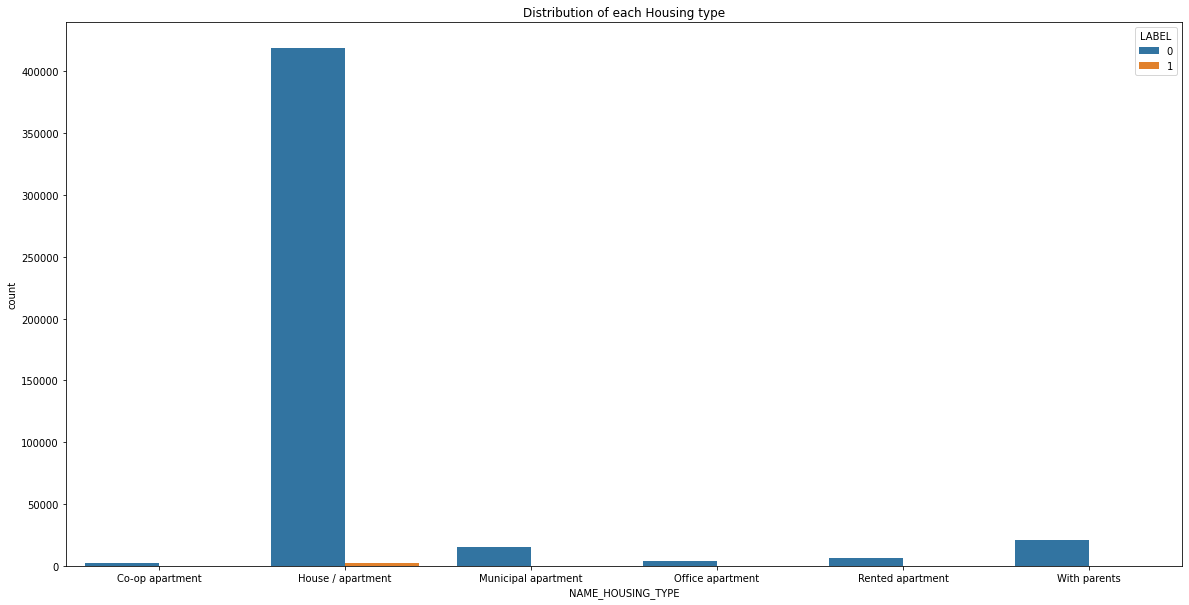

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(x='NAME_HOUSING_TYPE', data=credit_card,hue='LABEL')
plt.title('Distribution of each Housing type')
plt.show()

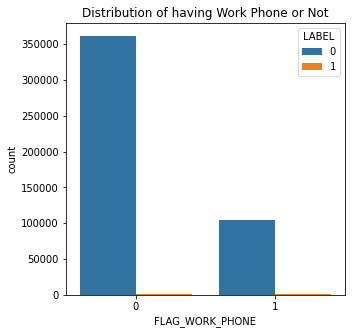

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(x='FLAG_WORK_PHONE', data=credit_card,hue='LABEL')
plt.title('Distribution of having Work Phone or Not')
plt.show()

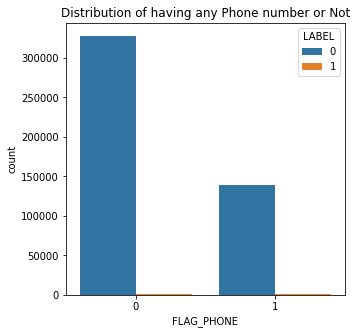

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(x='FLAG_PHONE', data=credit_card,hue='LABEL')
plt.title('Distribution of having any Phone number or Not')
plt.show()

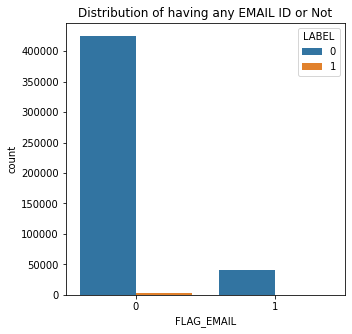

In [36]:
plt.figure(figsize=(5,5))
sns.countplot(x='FLAG_EMAIL', data=credit_card,hue='LABEL')
plt.title('Distribution of having any EMAIL ID or Not')
plt.show()

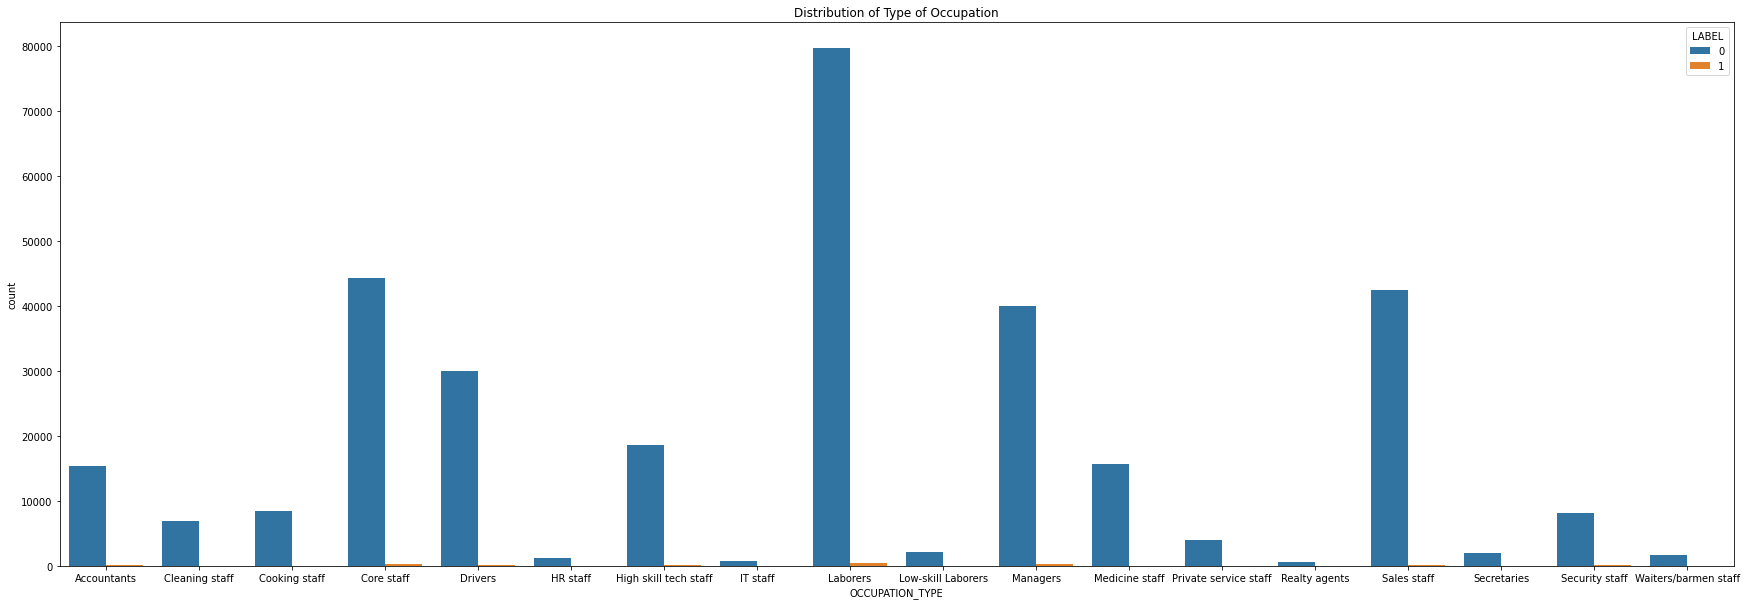

In [37]:
plt.figure(figsize=(30,10))
sns.countplot(x='OCCUPATION_TYPE', data=credit_card,hue='LABEL')
plt.title('Distribution of Type of Occupation')
plt.show()

Data Cleaning


In [38]:
credit_card.drop('OCCUPATION_TYPE',inplace=True,axis = 1)

In [39]:
# Dealing with categorical values
credit_card_1 = pd.get_dummies(credit_card,columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'])

In [40]:
credit_card_1.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'AGE',
       'WORKTERM', 'LABEL', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N',
       'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartme

In [41]:
credit_card_1.drop(['CODE_GENDER_M','FLAG_OWN_CAR_Y','FLAG_OWN_REALTY_Y','NAME_INCOME_TYPE_Working','NAME_EDUCATION_TYPE_Secondary / secondary special',
                   'NAME_FAMILY_STATUS_Widow','NAME_HOUSING_TYPE_With parents'],inplace=True,axis = 1)

Feature Selection

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
data = credit_card_1
X = credit_card_1.drop(['LABEL'],axis = 1)  #independent variable columns
y = credit_card_1.LABEL    #target variable column (price range)

In [43]:
#extracting top 4 best features by applying SelectKBest class
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
#concat two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #printing 15 best features

                                      Specs       Score
9                                  WORKTERM  109.886137
13    NAME_INCOME_TYPE_Commercial associate   80.191562
10                            CODE_GENDER_F   56.627564
27    NAME_HOUSING_TYPE_Municipal apartment   52.761029
21        NAME_FAMILY_STATUS_Civil marriage   50.736470
20      NAME_EDUCATION_TYPE_Lower secondary   48.922410
4                                FLAG_PHONE   44.809822
24  NAME_FAMILY_STATUS_Single / not married   44.453703
18     NAME_EDUCATION_TYPE_Higher education   39.690468
15           NAME_INCOME_TYPE_State servant   38.766561
3                           FLAG_WORK_PHONE   38.634140
26      NAME_HOUSING_TYPE_House / apartment   34.515563
25        NAME_HOUSING_TYPE_Co-op apartment   32.253156
14               NAME_INCOME_TYPE_Pensioner   29.288921
1                          AMT_INCOME_TOTAL   22.638200
12                        FLAG_OWN_REALTY_N   16.162029
22               NAME_FAMILY_STATUS_Married    9

In [44]:
credit_card_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468925 entries, 5008804 to 5150337
Data columns (total 31 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   CNT_CHILDREN                             468925 non-null  int64   
 1   AMT_INCOME_TOTAL                         468925 non-null  float64 
 2   FLAG_MOBIL                               468925 non-null  category
 3   FLAG_WORK_PHONE                          468925 non-null  category
 4   FLAG_PHONE                               468925 non-null  category
 5   FLAG_EMAIL                               468925 non-null  category
 6   CNT_FAM_MEMBERS                          468925 non-null  float64 
 7   MONTHS_BALANCE                           468925 non-null  int64   
 8   AGE                                      468925 non-null  int64   
 9   WORKTERM                                 468925 non-null  int64   
 10  LABEL        

In [45]:
X = credit_card_1.drop(['FLAG_MOBIL','CNT_CHILDREN','FLAG_EMAIL','FLAG_OWN_CAR_N','MONTHS_BALANCE','CNT_FAM_MEMBERS','AGE','LABEL'],axis = 1)
y = credit_card_1.LABEL

Deaking With Unbalanced Data

In [46]:
rus = RandomUnderSampler(random_state=42, replacement=True)
X_ns,y_ns=rus.fit_resample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns)))

The number of classes before fit Counter({0: 466377, 1: 2548})
The number of classes after fit Counter({0: 2548, 1: 2548})


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_ns,y_ns,test_size=0.2, random_state=42)

In [48]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.543015  ,  1.70747354,  1.43529093, ..., -0.22354919,
        -0.10325715, -0.13122448],
       [-0.89389521, -0.58566061, -0.69672286, ..., -0.22354919,
        -0.10325715, -0.13122448],
       [ 0.99208593, -0.58566061, -0.69672286, ..., -0.22354919,
        -0.10325715, -0.13122448],
       ...,
       [ 0.33418553, -0.58566061, -0.69672286, ..., -0.22354919,
        -0.10325715, -0.13122448],
       [ 2.52718686, -0.58566061,  1.43529093, ..., -0.22354919,
        -0.10325715, -0.13122448],
       [-0.89389521, -0.58566061, -0.69672286, ..., -0.22354919,
        -0.10325715, -0.13122448]])

In [49]:
X_test=sc.transform(X_test)
X_test

array([[ 0.55348566, -0.58566061, -0.69672286, ..., -0.22354919,
        -0.10325715, -0.13122448],
       [-0.543015  , -0.58566061,  1.43529093, ..., -0.22354919,
        -0.10325715, -0.13122448],
       [-0.76231513, -0.58566061, -0.69672286, ..., -0.22354919,
        -0.10325715, -0.13122448],
       ...,
       [ 5.15878845,  1.70747354,  1.43529093, ..., -0.22354919,
        -0.10325715, -0.13122448],
       [-0.76231513, -0.58566061, -0.69672286, ..., -0.22354919,
        -0.10325715, -0.13122448],
       [-0.98161526,  1.70747354,  1.43529093, ..., -0.22354919,
        -0.10325715, -0.13122448]])

In [50]:
### both will have same shape
X_train.shape, y_train.shape

((4076, 23), (4076,))

In [51]:
### both will have same shape
X_test.shape, y_test.shape

((1020, 23), (1020,))

In [52]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)

In [53]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [54]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 1, 0, ..., 1, 1, 0])

In [55]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[325, 201],
       [197, 297]])

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logistic_reg_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       526
           1       0.60      0.60      0.60       494

    accuracy                           0.61      1020
   macro avg       0.61      0.61      0.61      1020
weighted avg       0.61      0.61      0.61      1020



In [57]:
auc = metrics.roc_auc_score(y_test, logistic_reg_pred)
auc

0.6095426486661227

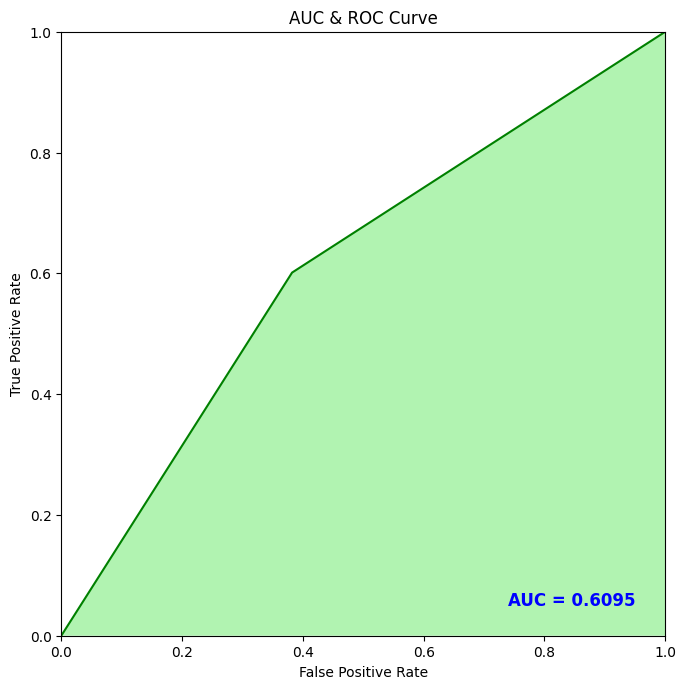

In [58]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logistic_reg_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [59]:
#Creating a svm Classifier
clf = svm.SVC() # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [60]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[435,  91],
       [189, 305]])

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       526
           1       0.77      0.62      0.69       494

    accuracy                           0.73      1020
   macro avg       0.73      0.72      0.72      1020
weighted avg       0.73      0.73      0.72      1020



In [62]:
 # defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.718 total time=   1.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.730 total time=   0.7s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.729 total time=   0.7s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.750 total time=   0.7s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.760 total time=   0.7s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.661 total time=   0.7s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.666 total time=   0.7s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.669 total time=   0.8s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.675 total time=   1.2s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.675 total time=   1.2s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.572 total time=   1.2s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [63]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 1}
SVC(C=1000, gamma=1)


In [64]:
#Create a svm Classifier
clf = svm.SVC(C=1000, gamma=1) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [65]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       526
           1       0.86      0.91      0.88       494

    accuracy                           0.88      1020
   macro avg       0.88      0.88      0.88      1020
weighted avg       0.88      0.88      0.88      1020



In [66]:
cm= confusion_matrix(y_test, grid_predictions) 
cm

array([[453,  73],
       [ 46, 448]])

In [67]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [68]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)

In [69]:
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [70]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[408 118]
 [ 62 432]]


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       526
           1       0.79      0.87      0.83       494

    accuracy                           0.82      1020
   macro avg       0.83      0.83      0.82      1020
weighted avg       0.83      0.82      0.82      1020



In [72]:
def knn_classifier_optuna (trial,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test):
    #define parameters
    params = {
    'n_neighbors'     : trial.suggest_categorical('n_neighbors', [1,3,5,7]), 
    'weights'         : trial.suggest_categorical('weights', ['uniform','distance']),
    'algorithm'       : trial.suggest_categorical('algorithm',['auto','ball_tree','kd_tree','brute']),
    'leaf_size'       : trial.suggest_int('leaf_size', 30, 150),
    'p'               : trial.suggest_int('p', 2, 50),
    
    }
        #creat model anf pass parameters 
    classifier= KNeighborsClassifier(**params)  
    classifier.fit(X_train, y_train)  
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [77]:
study = optuna.create_study(direction="maximize")
# #start serach 
study.optimize(knn_classifier_optuna, n_trials=200)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
params = []
for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

[I 2023-02-08 23:36:28,912] A new study created in memory with name: no-name-eaa5ade9-11b6-4ec1-9f9d-1c1e99366ef5
[I 2023-02-08 23:36:33,164] Trial 0 finished with value: 0.865686274509804 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 73, 'p': 24}. Best is trial 0 with value: 0.865686274509804.
[I 2023-02-08 23:36:37,714] Trial 1 finished with value: 0.8647058823529412 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 104, 'p': 25}. Best is trial 0 with value: 0.865686274509804.
[I 2023-02-08 23:36:41,881] Trial 2 finished with value: 0.8323529411764706 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 78, 'p': 36}. Best is trial 0 with value: 0.865686274509804.
[I 2023-02-08 23:36:45,866] Trial 3 finished with value: 0.8186274509803921 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 92, 'p': 18}. Best is tria

Number of finished trials:  200
Best trial:
  Value: 0.8676470588235294
  Params: 
    n_neighbors: 5
    weights: distance
    algorithm: kd_tree
    leaf_size: 121
    p: 2


In [78]:
classifier= KNeighborsClassifier(n_neighbors= 7,weights='distance',algorithm= 'auto',leaf_size= 84, p=39)  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test) 
cm= confusion_matrix(y_test, y_pred) 
print(cm)

[[430  96]
 [ 38 456]]


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       526
           1       0.83      0.92      0.87       494

    accuracy                           0.87      1020
   macro avg       0.87      0.87      0.87      1020
weighted avg       0.87      0.87      0.87      1020



In [80]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       526
           1       0.82      0.91      0.86       494

    accuracy                           0.86      1020
   macro avg       0.86      0.86      0.86      1020
weighted avg       0.86      0.86      0.86      1020



In [82]:
cm= confusion_matrix(y_test, y_pred) 
cm


array([[427,  99],
       [ 44, 450]])

In [83]:
#Fitting Decision Tree classifier to the training set  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [84]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)

In [85]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm


array([[470,  56],
       [ 43, 451]])

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       526
           1       0.89      0.91      0.90       494

    accuracy                           0.90      1020
   macro avg       0.90      0.90      0.90      1020
weighted avg       0.90      0.90      0.90      1020



In [87]:
def rf_classifier_optuna (trial,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test):
    #define parameters
    params = {
    'n_estimators'     : trial.suggest_int('n_estimators', 2, 20), 
    'max_depth'         : int(trial.suggest_loguniform('max_depth', 1, 32))
    }
        #creat model anf pass parameters 
    classifier= RandomForestClassifier(**params)  
    classifier.fit(X_train, y_train)  
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [88]:
study = optuna.create_study(direction="maximize")
# #start serach 
study.optimize(rf_classifier_optuna, n_trials=200)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
params = []
for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

[I 2023-02-08 23:46:11,653] A new study created in memory with name: no-name-ea84d2f2-6308-4117-9622-94fdf19a211d
[I 2023-02-08 23:46:11,681] Trial 0 finished with value: 0.8274509803921568 and parameters: {'n_estimators': 3, 'max_depth': 13.323349953425677}. Best is trial 0 with value: 0.8274509803921568.
[I 2023-02-08 23:46:11,744] Trial 1 finished with value: 0.6901960784313725 and parameters: {'n_estimators': 20, 'max_depth': 5.908471036819885}. Best is trial 0 with value: 0.8274509803921568.
[I 2023-02-08 23:46:11,769] Trial 2 finished with value: 0.6078431372549019 and parameters: {'n_estimators': 8, 'max_depth': 2.3205125830035582}. Best is trial 0 with value: 0.8274509803921568.
[I 2023-02-08 23:46:11,796] Trial 3 finished with value: 0.6098039215686275 and parameters: {'n_estimators': 8, 'max_depth': 3.09330094884801}. Best is trial 0 with value: 0.8274509803921568.
[I 2023-02-08 23:46:11,825] Trial 4 finished with value: 0.6745098039215687 and parameters: {'n_estimators': 8, 

Number of finished trials:  200
Best trial:
  Value: 0.9058823529411765
  Params: 
    n_estimators: 17
    max_depth: 23.131913317667788


In [89]:
classifier= RandomForestClassifier(n_estimators= 16,max_depth= 29)  
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=29, n_estimators=16)

In [90]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [91]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[461,  65],
       [ 38, 456]])

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       526
           1       0.88      0.92      0.90       494

    accuracy                           0.90      1020
   macro avg       0.90      0.90      0.90      1020
weighted avg       0.90      0.90      0.90      1020



In [93]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [94]:
#Creating the Confusion matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[401, 125],
       [161, 333]])

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74       526
           1       0.73      0.67      0.70       494

    accuracy                           0.72      1020
   macro avg       0.72      0.72      0.72      1020
weighted avg       0.72      0.72      0.72      1020



In [96]:
def XGBclassifier_optuna(trial,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Fit the model
    classifier= XGBClassifier(**params)  
    classifier.fit(X_train, y_train, y_train)  
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [97]:
study = optuna.create_study(direction="maximize")
# #start serach 
study.optimize(XGBclassifier_optuna, n_trials=200)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
params = []
for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

[I 2023-02-08 23:48:20,579] A new study created in memory with name: no-name-e9e40078-9b8b-4e31-9ece-12c6459038a9
[I 2023-02-08 23:48:20,877] Trial 0 finished with value: 0.4843137254901961 and parameters: {'max_depth': 3, 'learning_rate': 0.5445893728332221, 'n_estimators': 132, 'min_child_weight': 6, 'gamma': 0.0010617687956800445, 'subsample': 0.3503439941372331, 'colsample_bytree': 0.3914340479569349, 'reg_alpha': 4.6856488535631315e-05, 'reg_lambda': 0.06971544618484289}. Best is trial 0 with value: 0.4843137254901961.
[I 2023-02-08 23:48:21,193] Trial 1 finished with value: 0.4843137254901961 and parameters: {'max_depth': 1, 'learning_rate': 0.09971630020995052, 'n_estimators': 198, 'min_child_weight': 1, 'gamma': 1.6484942140674985e-06, 'subsample': 0.059860655021131894, 'colsample_bytree': 0.02262475834856628, 'reg_alpha': 0.003882006639035228, 'reg_lambda': 0.0002857700419826134}. Best is trial 0 with value: 0.4843137254901961.
[I 2023-02-08 23:48:21,691] Trial 2 finished with

Number of finished trials:  200
Best trial:
  Value: 0.4843137254901961
  Params: 
    max_depth: 3
    learning_rate: 0.5445893728332221
    n_estimators: 132
    min_child_weight: 6
    gamma: 0.0010617687956800445
    subsample: 0.3503439941372331
    colsample_bytree: 0.3914340479569349
    reg_alpha: 4.6856488535631315e-05
    reg_lambda: 0.06971544618484289


In [98]:
xgb = XGBClassifier(max_depth= 9, learning_rate = 0.3,
    n_estimators = 189,
    min_child_weight = 1,
    gamma = 0.1,
    subsample = 0.9,
    colsample_bytree = 0.6,
    reg_alpha= 0.23,
    reg_lambda = 0)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [99]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[455,  71],
       [ 41, 453]])

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       526
           1       0.86      0.92      0.89       494

    accuracy                           0.89      1020
   macro avg       0.89      0.89      0.89      1020
weighted avg       0.89      0.89      0.89      1020

